In [2]:
%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 13.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, FeatureAgglomeration, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(images):
    """
    Preprocess image data for clustering
    Args:
        images: Input array of shape (n_samples, 1, 28, 28)
    Returns:
        Processed array of shape (n_samples, 784)
    """
    # Reshape to 2D array (flatten images)
    flattened = images.reshape(images.shape[0], -1)
    
    # Normalize pixel values
    scaler = StandardScaler()
    normalized = scaler.fit_transform(flattened)
    
    return normalized

def create_embeddings(data, n_components=50):
    """
    Create dimensionality-reduced embeddings using PCA
    Args:
        data: Preprocessed data from preprocess_data()
        n_components: Number of PCA components to retain
    Returns:
        PCA-transformed data
    """
    pca = PCA(n_components=n_components, random_state=42)
    embeddings = pca.fit_transform(data)
    return embeddings

def cluster_data(data, algorithm='kmeans', n_clusters=10):
    """
    Cluster data using specified algorithm
    Args:
        data: Embeddings from create_embeddings()
        algorithm: 'kmeans', 'dbscan', or 'agglomerative'
        n_clusters: Number of clusters (for kmeans/agglomerative)
    Returns:
        Cluster labels
    """
    if algorithm == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm == 'dbscan':
        model = DBSCAN(eps=3.5, min_samples=10)
    elif algorithm == 'agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        # model = AgglomerativeClustering(distance_threshold=10, n_clusters=None, compute_full_tree=False)
    elif algorithm == 'gmm':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
    else:
        raise ValueError("Unsupported algorithm")
        
    return model.fit_predict(data)

def evaluate_clustering(data, labels):
    """
    Evaluate clustering performance using multiple metrics
    Args:
        data: Embeddings used for clustering
        labels: Cluster labels from cluster_data()
    """
    metrics = {
        'Silhouette Score': silhouette_score(data, labels),
        'Davies-Bouldin Index': davies_bouldin_score(data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(data, labels)
    }
    
    print("Clustering Metrics:")
    for name, score in metrics.items():
        print(f"{name}: {score:.4f}")

def visualize_tsne(data, labels, n_samples=20000):
    """
    Visualize clusters using t-SNE dimensionality reduction
    Args:
        data: Original or PCA-reduced data
        labels: Cluster labels
        n_samples: Number of samples to visualize (for performance)
    """
    subset = np.random.choice(len(data), n_samples, replace=False)
    data_sub = data[subset]
    labels_sub = labels[subset]
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data_sub)
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=tsne_results[:,0], y=tsne_results[:,1],
        hue=labels_sub, palette=sns.color_palette("hls", 10),
        legend='full', alpha=0.7
    )
    plt.title('t-SNE Visualization of Clusters')
    plt.show()





Clustering with KMEANS
Clustering Metrics:
Silhouette Score: 0.1292
Davies-Bouldin Index: 1.8957
Calinski-Harabasz Score: 4380.2897


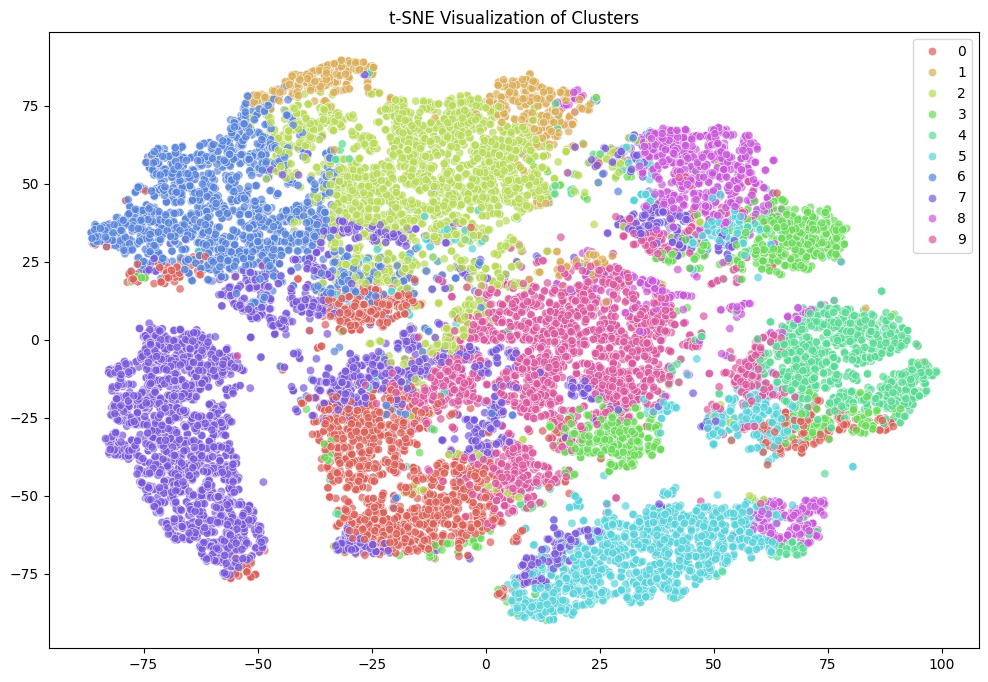

In [3]:

if __name__ == "__main__":
    # Load data
    X_train = np.load('../datasets/unlabelled_train_data_images.npy')
    
    # Preprocess
    processed_data = preprocess_data(X_train)
    
    # Create embeddings
    embeddings = create_embeddings(processed_data, n_components=20)
    
    # Cluster with different algorithms
    # algorithms = ['kmeans', 'gmm', 'dbscan', 'agglomerative']
    algorithms = ['kmeans']
    for algo in algorithms:
        print(f"\nClustering with {algo.upper()}")
        labels = cluster_data(embeddings, algorithm=algo)
        evaluate_clustering(embeddings, labels)
        visualize_tsne(embeddings, labels)

/var/folders/tw/l5tzs72d3dd0wms159v1b2980000gn/T/ipykernel_9117/3331268052.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


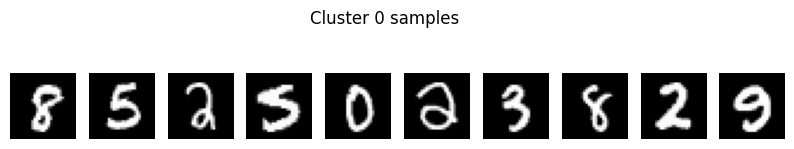

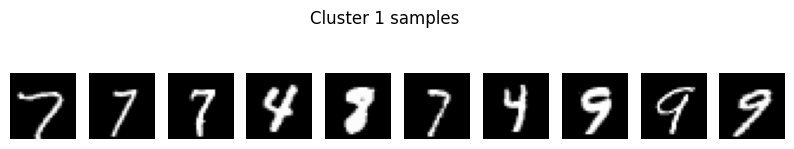

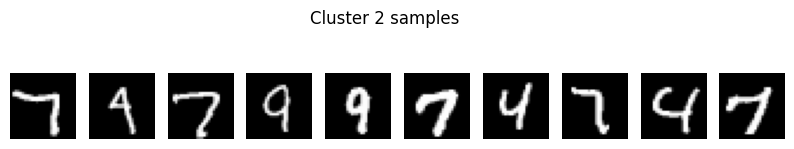

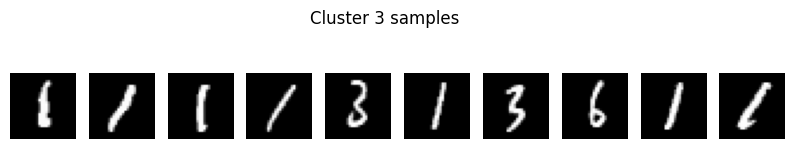

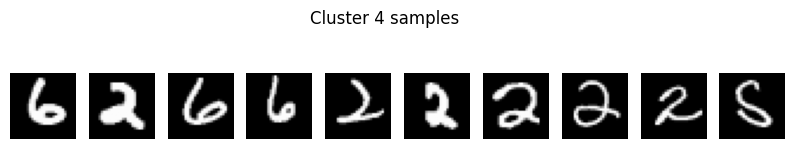

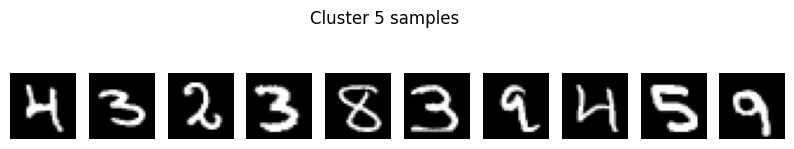

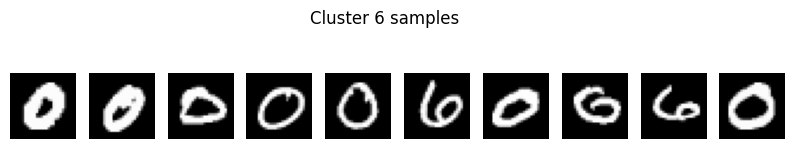

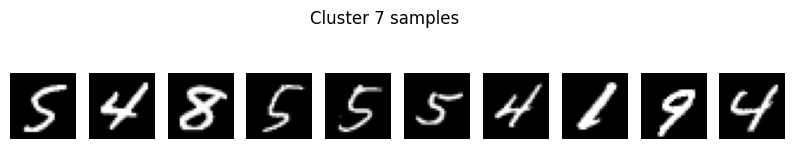

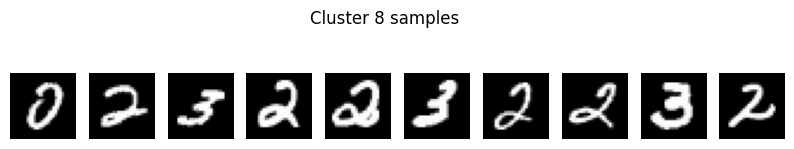

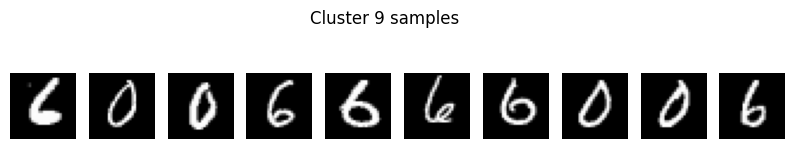

Saved features and manual labels to Y_train_manual_labels.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def preprocess_data(images):
    """
    Preprocess image data: flatten and normalize.
    """
    flattened = images.reshape(images.shape[0], -1)
    scaler = StandardScaler()
    normalized = scaler.fit_transform(flattened)
    return normalized

def create_embeddings(data, n_components=50):
    """
    Create PCA embeddings.
    """
    pca = PCA(n_components=n_components, random_state=42)
    embeddings = pca.fit_transform(data)
    return embeddings

def cluster_data(data, n_clusters=10):
    """
    Cluster data using KMeans.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

def visualize_cluster_samples(images, cluster_labels, cluster_id, n_samples=10):
    """
    Visualize random samples from a cluster.
    """
    idx = np.where(cluster_labels == cluster_id)[0]
    chosen = np.random.choice(idx, min(n_samples, len(idx)), replace=False)
    plt.figure(figsize=(10, 2))
    for i, img_idx in enumerate(chosen):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(images[img_idx, 0], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_id} samples")
    plt.show()

def manual_label_clusters(images, cluster_labels, n_clusters=10):
    """
    Prompt user to assign a label to each cluster after visual inspection.
    """
    cluster_to_label = {}
    for cluster_id in range(n_clusters):
        visualize_cluster_samples(images, cluster_labels, cluster_id)
        label = input(f"Enter the true label for cluster {cluster_id}: ")
        cluster_to_label[cluster_id] = label
    manual_labels = np.array([cluster_to_label[c] for c in cluster_labels])
    return manual_labels

def save_features_and_labels(features, labels, output_csv):
    """
    Save PCA features and manual labels to CSV.
    """
    df = pd.DataFrame(features, columns=[f'PC{i+1}' for i in range(features.shape[1])])
    df['label'] = labels
    df.to_csv(output_csv, index=False)
    print(f"Saved features and manual labels to {output_csv}")

if __name__ == "__main__":
    # Load data
    X_train_img = np.load('../datasets/unlabelled_train_data_images.npy')
    
    # Preprocess
    processed_data = preprocess_data(X_train_img)
    
    # Embedding
    embeddings = create_embeddings(processed_data, n_components=50)
    
    # Clustering
    cluster_labels = cluster_data(embeddings, n_clusters=10)
    
    # Manual labeling
    manual_labels = manual_label_clusters(X_train_img, cluster_labels, n_clusters=10)
    
    # Save
    save_features_and_labels(embeddings, manual_labels, '../datasets/Y_train_manual_labels.csv')


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def optimized_preprocessing(images, n_components=0.95):
    """
    Advanced preprocessing pipeline for MNIST clustering
    Args:
        images: Input array of shape (n_samples, 1, 28, 28)
        n_components: Variance ratio to preserve (0.0-1.0)
    Returns:
        Processed features, PCA object
    """
    # Flatten images
    flattened = images.reshape(images.shape[0], -1)
    
    # Advanced normalization
    scaler = StandardScaler()
    normalized = scaler.fit_transform(flattened)
    
    # PCA with automatic component selection
    pca = PCA(n_components=n_components, svd_solver='full')
    reduced = pca.fit_transform(normalized)
    
    print(f"Reduced to {pca.n_components_} components "
          f"({pca.explained_variance_ratio_.sum():.1%} variance retained)")
    
    return reduced, pca

def improved_clustering(data, n_clusters=10):
    """
    Enhanced K-means implementation with optimized parameters
    """
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init='auto',
        max_iter=300,
        tol=1e-5,
        random_state=42
    )
    return kmeans.fit_predict(data)

def visualize_embeddings(data, labels):
    """
    t-SNE visualization of clustered embeddings
    """
    tsne = TSNE(n_components=2, perplexity=30, 
                learning_rate=200, random_state=42)
    tsne_features = tsne.fit_transform(data)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(tsne_features[:,0], tsne_features[:,1], 
                c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('t-SNE of PCA-Reduced MNIST Features')
    plt.show()

# For challenging cases, add UMAP preprocessing
from umap import UMAP

def umap_preprocessing(data, n_components=15):
    """UMAP for non-linear dimensionality reduction"""
    reducer = UMAP(n_components=n_components, 
                  n_neighbors=15,
                  min_dist=0.1,
                  random_state=42)
    return reducer.fit_transform(data)

# Use instead of PCA for non-linear relationships
umap_data = umap_preprocessing(processed_data)

# Usage pipeline
if __name__ == "__main__":
    # Load data
    X_train_img = np.load('../datasets/unlabelled_train_data_images.npy')
    
    # Advanced preprocessing
    processed_data, pca = optimized_preprocessing(X_train_img)
    
    # Clustering
    cluster_labels = improved_clustering(processed_data)
    
    # Evaluation
    print("\nImproved Metrics:")
    print(f"Silhouette Score: {silhouette_score(processed_data, cluster_labels):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(processed_data, cluster_labels):.4f}") 
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(processed_data, cluster_labels):.1f}")
    
    # Visualization
    visualize_embeddings(processed_data, cluster_labels)


In [1]:
import numpy as np
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

def umap_enhanced_clustering(images, n_components=10):
    """
    UMAP-optimized clustering pipeline for MNIST
    Args:
        images: Input array of shape (n_samples, 1, 28, 28)
        n_components: UMAP output dimensions (2-15 recommended)
    Returns:
        Cluster labels, UMAP embeddings
    """
    # Flatten and normalize
    flattened = images.reshape(images.shape[0], -1)
    scaled = StandardScaler().fit_transform(flattened)
    
    # UMAP with cluster-optimized parameters
    umap_emb = UMAP(
        n_components=n_components,
        n_neighbors=30,       # Focus on global structure
        min_dist=0.0,         # Pack points tightly
        metric='euclidean',
        random_state=42
    ).fit_transform(scaled)
    
    # Cluster in UMAP space
    kmeans = KMeans(n_clusters=10, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(umap_emb)
    
    return labels, umap_emb

# Usage
X_train_img = np.load('../datasets/unlabelled_train_data_images.npy')
labels, embeddings = umap_enhanced_clustering(X_train_img)

# Evaluation
print(f"Silhouette Score: {silhouette_score(embeddings, labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(embeddings, labels):.4f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette Score: 0.5085
Davies-Bouldin Index: 0.7468


PCA retained 459 components (98% variance)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Clustering Metrics:
Silhouette Score: 0.4671
Davies-Bouldin Index: 0.7874
K-means Inertia: 143714.28


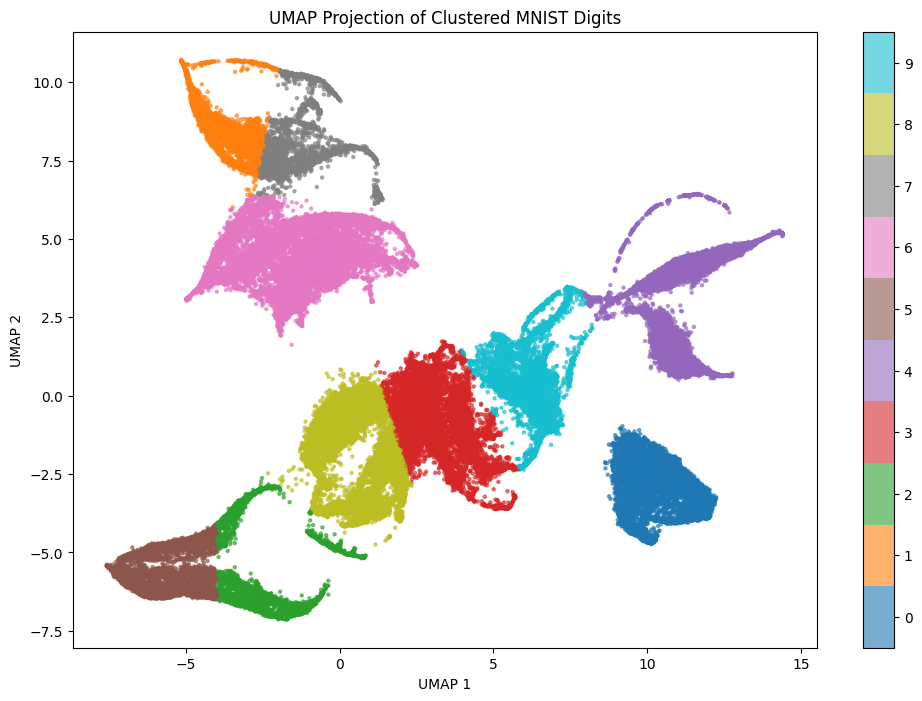

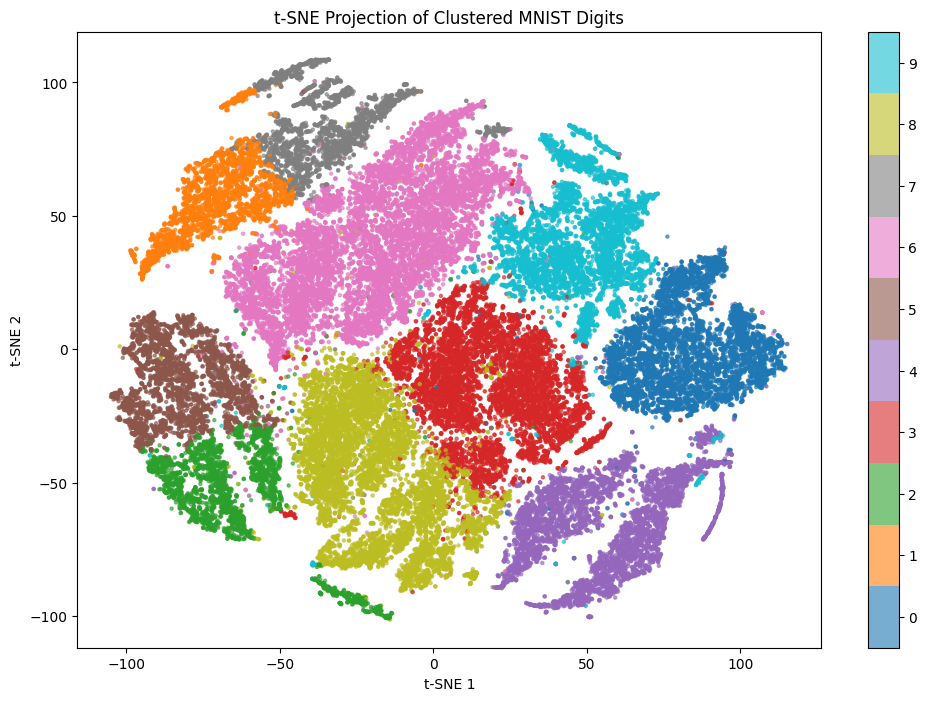

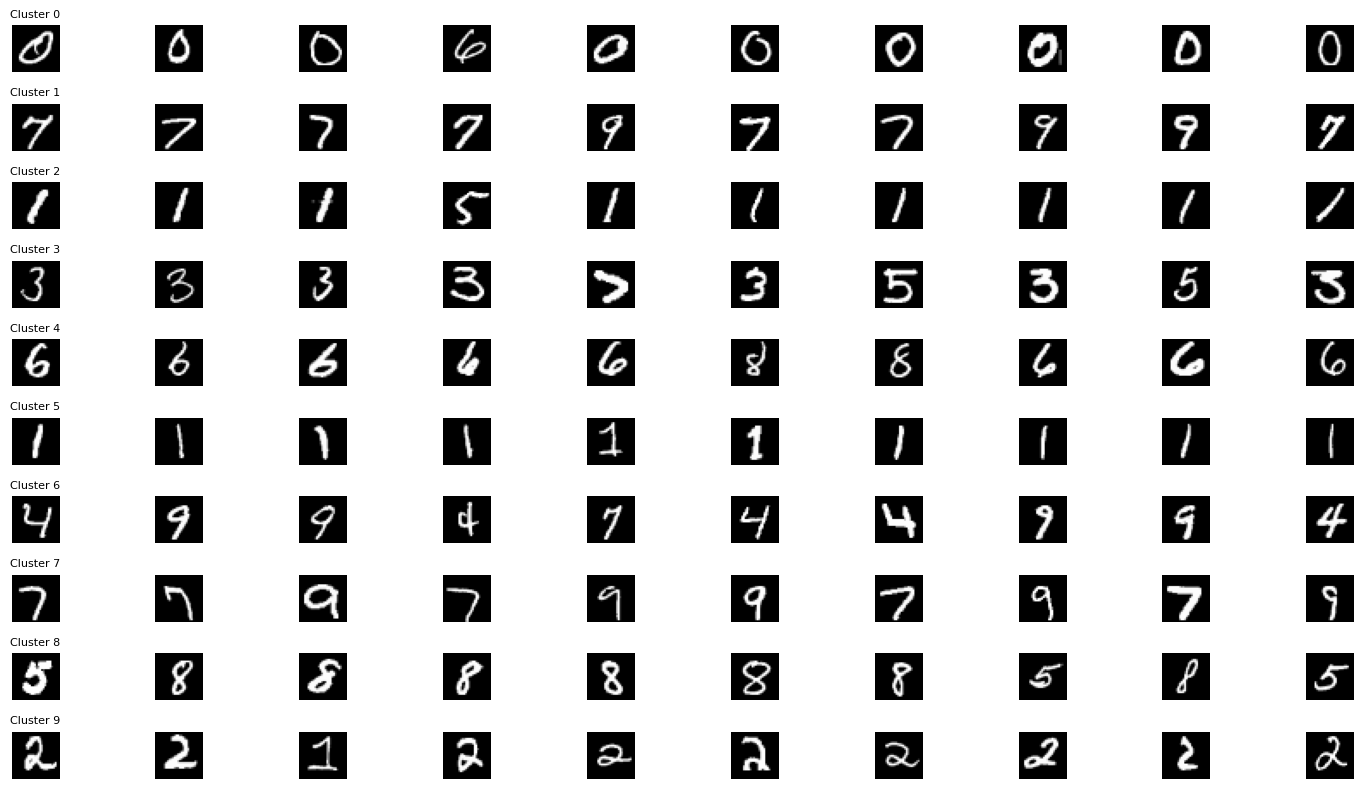

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import pandas as pd

def enhanced_preprocessing(images, pca_variance=0.98):
    """Combined PCA-UMAP preprocessing pipeline"""
    # Flatten and standardize
    flattened = images.reshape(images.shape[0], -1)
    scaled = StandardScaler().fit_transform(flattened)
    
    # Stage 1: PCA for initial denoising
    pca = PCA(n_components=pca_variance, svd_solver='full')
    pca_features = pca.fit_transform(scaled)
    print(f"PCA retained {pca.n_components_} components "
          f"({pca_variance*100:.0f}% variance)")
    
    # Stage 2: UMAP for nonlinear reduction
    umap_emb = UMAP(
        n_components=2,
        n_neighbors=30,
        min_dist=0.1,
        metric='euclidean',
        random_state=42
    ).fit_transform(pca_features)
    
    return umap_emb, pca, scaled

def visualize_clusters(embeddings, labels, method='UMAP'):
    """Visualize clusters in 2D embedding space"""
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embeddings[:,0], embeddings[:,1], 
                         c=labels, cmap='tab10', s=5, alpha=0.6)
    plt.colorbar(scatter, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(f'{method} Projection of Clustered MNIST Digits')
    plt.xlabel(f'{method} 1')
    plt.ylabel(f'{method} 2')
    plt.show()

def cluster_analysis(embeddings, n_clusters=10):
    """Perform clustering and return metrics"""
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(embeddings)
    
    metrics = {
        'Silhouette': silhouette_score(embeddings, labels),
        'Davies-Bouldin': davies_bouldin_score(embeddings, labels),
        'Inertia': kmeans.inertia_
    }
    
    return labels, metrics

def visualize_sample_digits(images, labels, n_samples=20):
    """Display random samples from each cluster"""
    unique_labels = np.unique(labels)
    plt.figure(figsize=(15, 8))
    
    for i, label in enumerate(unique_labels):
        # Get 10 random samples from cluster
        cluster_indices = np.where(labels == label)[0]
        samples = np.random.choice(cluster_indices, n_samples, replace=False)
        
        for j, idx in enumerate(samples):
            plt.subplot(len(unique_labels), n_samples, i*n_samples + j + 1)
            plt.imshow(images[idx, 0], cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(f'Cluster {label}', fontsize=8)
    plt.tight_layout()
    plt.show()

# Main pipeline
if __name__ == "__main__":
    # Load data
    X_train_img = np.load('../datasets/unlabelled_train_data_images.npy')
    
    # Enhanced preprocessing
    umap_emb, pca_model, scaled_data = enhanced_preprocessing(X_train_img)
    
    # Clustering and evaluation
    cluster_labels, metrics = cluster_analysis(umap_emb)
    print("\nClustering Metrics:")
    print(f"Silhouette Score: {metrics['Silhouette']:.4f}")
    print(f"Davies-Bouldin Index: {metrics['Davies-Bouldin']:.4f}")
    print(f"K-means Inertia: {metrics['Inertia']:.2f}")
    
    # Visualization
    visualize_clusters(umap_emb, cluster_labels, 'UMAP')
    
    # t-SNE comparison
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_emb = tsne.fit_transform(scaled_data)
    visualize_clusters(tsne_emb, cluster_labels, 't-SNE')
    
    # Cluster sample visualization
    visualize_sample_digits(X_train_img, cluster_labels)
    
    # Save results
    df = pd.DataFrame({
        'UMAP1': umap_emb[:,0],
        'UMAP2': umap_emb[:,1],
        'Cluster': cluster_labels
    })
    df.to_csv('../datasets/cluster_assignments.csv', index=False)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


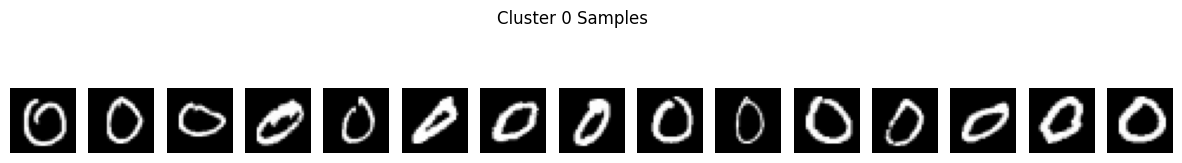

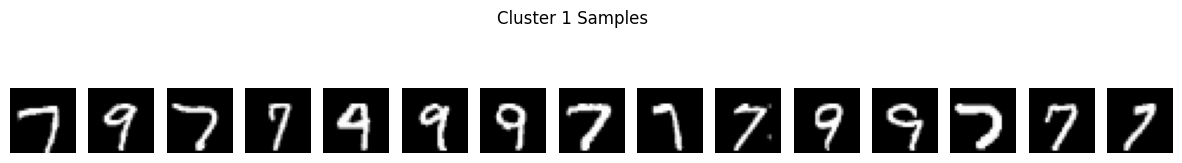

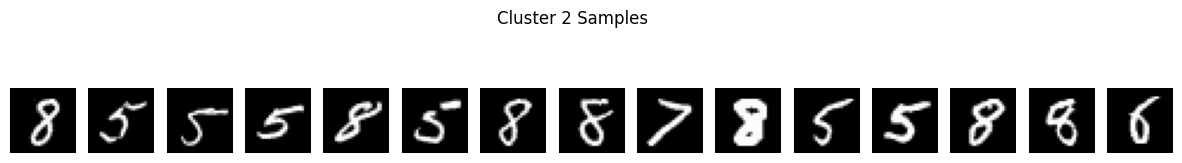

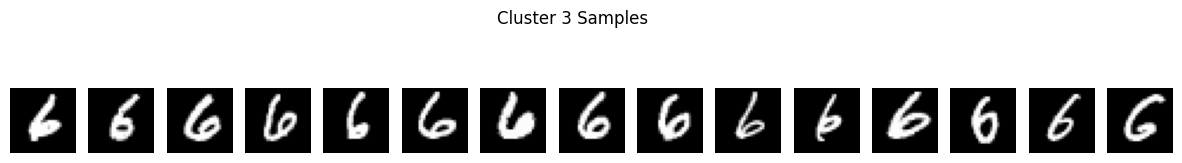

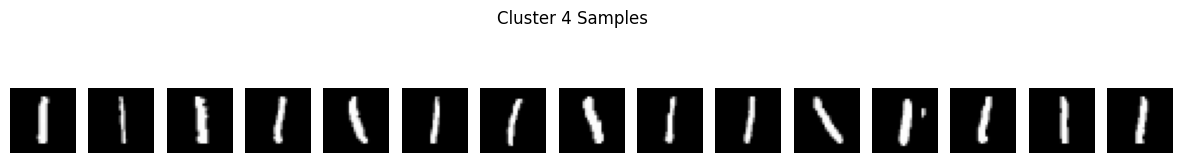

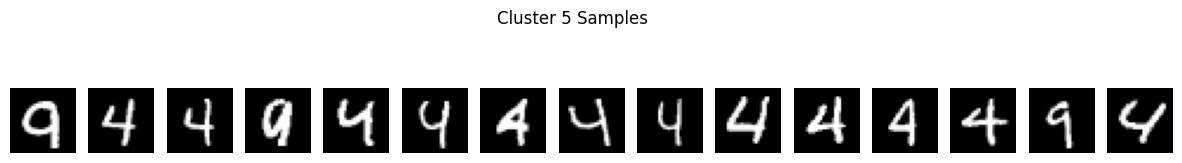

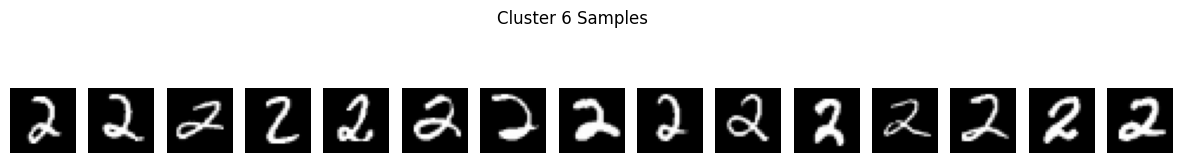

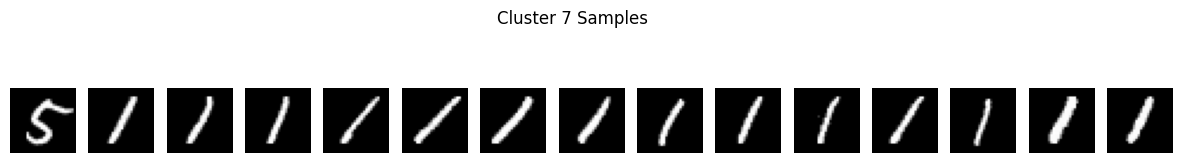

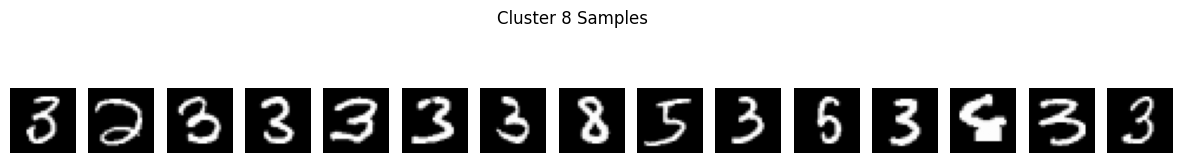

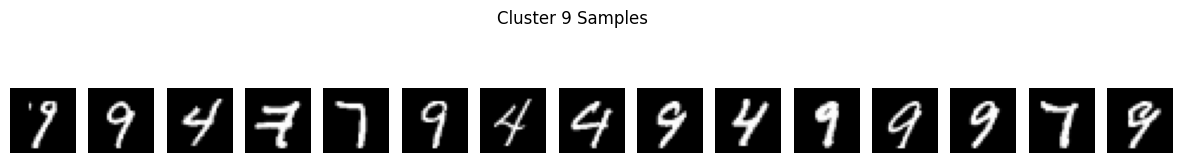

Saved labeled dataset to ../datasets/labeled_mnist.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import KMeans

class MNISTClusterLabeler:
    def __init__(self, image_path):
        self.images = np.load(image_path)
        self.labels = None
        self.features = None
        self.cluster_map = {}
        
    def preprocess(self, pca_variance=0.95):
        """Dimensionality reduction pipeline"""
        # Flatten and standardize
        flattened = self.images.reshape(len(self.images), -1)
        scaled = StandardScaler().fit_transform(flattened)
        
        # PCA -> UMAP pipeline
        pca = PCA(n_components=pca_variance, svd_solver='full')
        pca_features = pca.fit_transform(scaled)
        
        umap_emb = UMAP(
            n_components=2,
            n_neighbors=30,
            min_dist=0.1,
            random_state=42
        ).fit_transform(pca_features)
        
        self.features = pd.DataFrame(umap_emb, columns=['UMAP1', 'UMAP2'])
        return self
    
    def cluster(self, n_clusters=10):
        """Initial clustering"""
        kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
        self.labels = kmeans.fit_predict(self.features)
        self.features['Cluster'] = self.labels
        return self
    
    def _show_cluster_samples(self, cluster_id, samples_per_cluster=15):
        """Visualize cluster contents"""
        cluster_images = self.images[self.labels == cluster_id]
        sample_indices = np.random.choice(len(cluster_images), samples_per_cluster)
        
        plt.figure(figsize=(15, 2))
        for i, idx in enumerate(sample_indices):
            plt.subplot(1, samples_per_cluster, i+1)
            plt.imshow(cluster_images[idx][0], cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {cluster_id} Samples', y=1.05)
        plt.show()
    
    def relabel_clusters(self):
        """Interactive cluster relabeling"""
        unique_clusters = np.unique(self.labels)
        self.cluster_map = {}
        
        for cluster_id in unique_clusters:
            self._show_cluster_samples(cluster_id)
            
            while True:
                label = input(f"Enter digit label for cluster {cluster_id} (0-9): ")
                if label.isdigit() and 0 <= int(label) <= 9:
                    self.cluster_map[cluster_id] = int(label)
                    break
                print("Invalid input! Please enter a digit between 0-9.")
        
        # Apply new labels
        self.features['Label'] = self.features['Cluster'].map(self.cluster_map)
        return self
    
    def save(self, output_path):
        """Save features and labels"""
        self.features[['UMAP1', 'UMAP2', 'Label']].to_csv(output_path, index=False)
        print(f"Saved labeled dataset to {output_path}")
        return self

# Usage example
if __name__ == "__main__":
    labeler = (MNISTClusterLabeler('../datasets/unlabelled_train_data_images.npy')
               .preprocess()
               .cluster()
               .relabel_clusters()
               .save('../datasets/labeled_mnist.csv'))


Model Evaluation:
Accuracy: 0.9977

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1208
           1     0.9986    1.0000    0.9993      1400
           2     1.0000    0.9915    0.9957      1178
           3     0.9917    1.0000    0.9958      1673
           4     0.9981    0.9972    0.9976      1057
           5     1.0000    0.9960    0.9980      1760
           6     0.9991    1.0000    0.9996      1174
           7     1.0000    0.9934    0.9967      1210
           9     0.9933    1.0000    0.9967      1340

    accuracy                         0.9977     12000
   macro avg     0.9979    0.9976    0.9977     12000
weighted avg     0.9977    0.9977    0.9977     12000



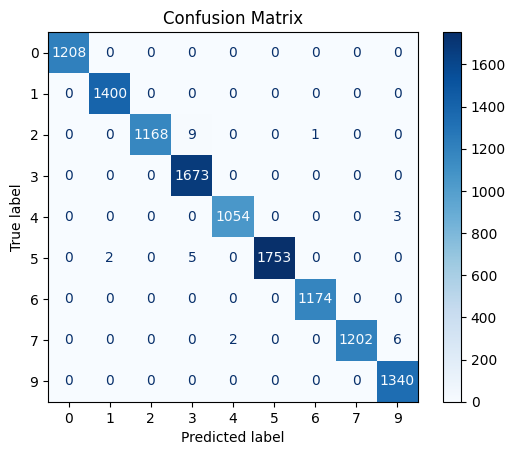

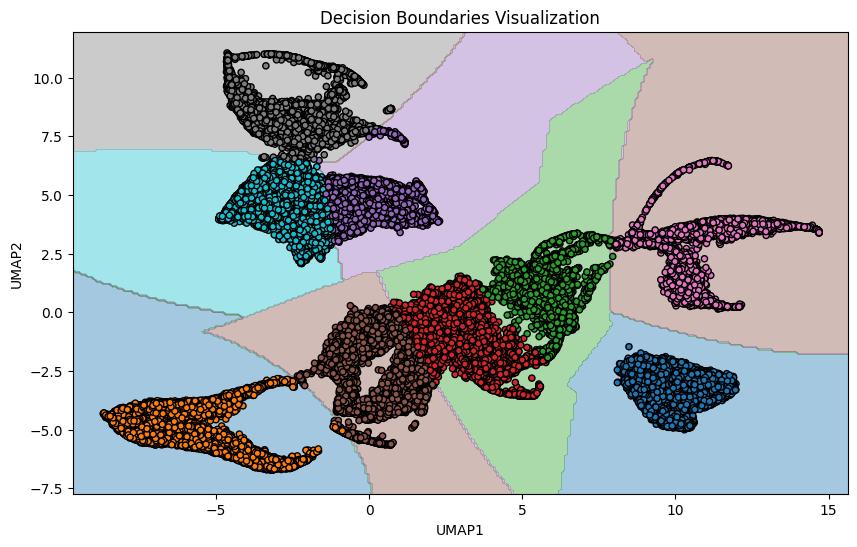


Saved trained model as mnist_umap_classifier.pkl

Sample prediction: 3


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import joblib

def load_and_prepare_data(csv_path, test_size=0.2, random_state=42):
    """
    Load labeled dataset and prepare for training
    Returns:
        X_train, X_test, y_train, y_test
    """
    df = pd.read_csv(csv_path)
    
    # Separate features and labels
    X = df[['UMAP1', 'UMAP2']].values
    y = df['Label'].values
    
    # Split dataset
    return train_test_split(X, y, test_size=test_size, 
                            random_state=random_state, stratify=y)

def load_and_prepare_data_gzip(csv_path, test_size=0.2, random_state=42):
    """
    Load labeled dataset with original pixel data and prepare for training
    Returns:
        X_train, X_test, y_train, y_test (pixel values 0-255)
    """
    df = pd.read_csv(csv_path, compression='gzip')
    
    # Separate features (pixels) and labels
    X = df.drop('label', axis=1).values.astype(np.uint8)
    y = df['label'].values
    
    # Split dataset (stratify to maintain label distribution)
    return train_test_split(X, y, test_size=test_size, 
                            random_state=random_state, stratify=y)


def train_model(X_train, y_train, model_type='svm'):
    """
    Train a classification model with automatic hyperparameters
    Supported models: 'svm', 'randomforest', 'mlp'
    """
    if model_type == 'svm':
        model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
    elif model_type == 'randomforest':
        model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                      random_state=42)
    elif model_type == 'mlp':
        model = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.01,
                             max_iter=1000, random_state=42)
    else:
        raise ValueError("Unknown model type")
    
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Generate comprehensive evaluation report"""
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def plot_decision_boundaries(model, X, y):
    """Visualize model's decision boundaries"""
    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='tab10')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='tab10')
    plt.title('Decision Boundaries Visualization')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()

# Main workflow
if __name__ == "__main__":
    # 1. Load data
    X_train, X_test, y_train, y_test = load_and_prepare_data('../datasets/labeled_mnist.csv')
    
    # 2. Train model (choose 'svm', 'randomforest', or 'mlp')
    model = train_model(X_train, y_train, model_type='svm')
    
    # 3. Evaluate
    print("Model Evaluation:")
    evaluate_model(model, X_test, y_test)
    
    # 4. Visualize decision boundaries
    plot_decision_boundaries(model, X_train, y_train)
    
    # 5. Save model
    joblib.dump(model, 'mnist_umap_classifier.pkl')
    print("\nSaved trained model as mnist_umap_classifier.pkl")
    
    # Example prediction
    sample = np.array([[5.0, -3.0]])  # UMAP coordinates
    print(f"\nSample prediction: {model.predict(sample)[0]}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


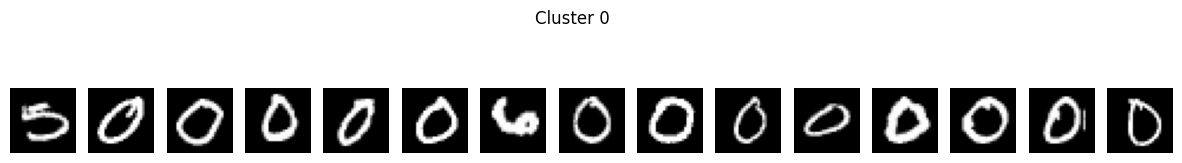

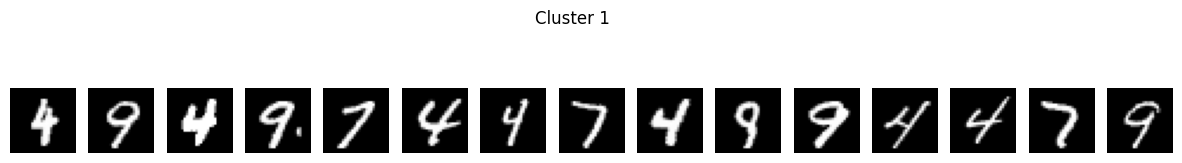

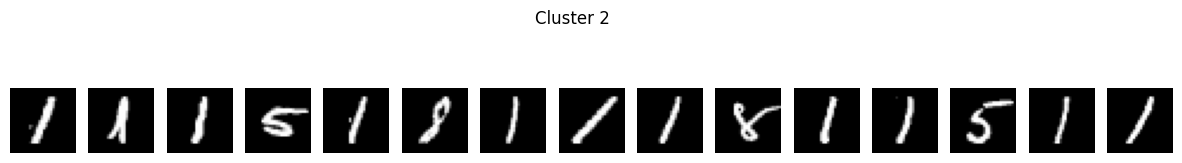

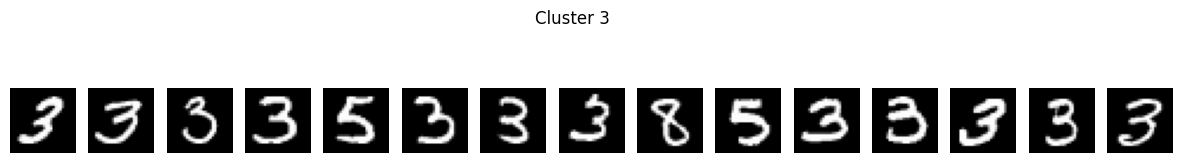

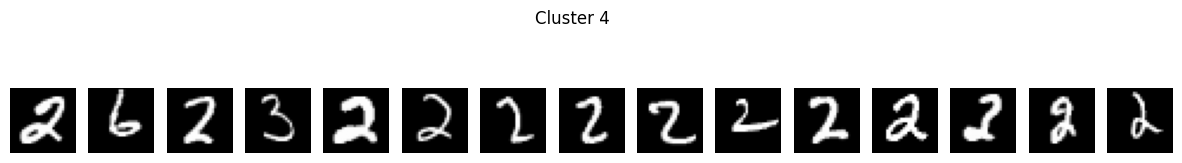

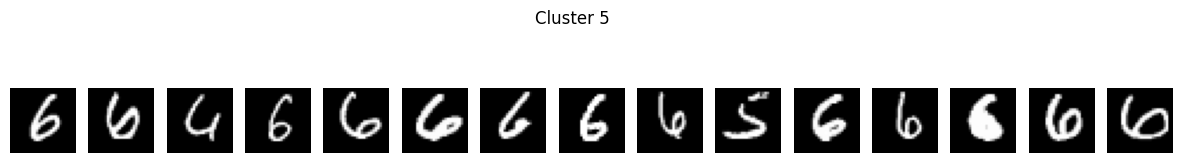

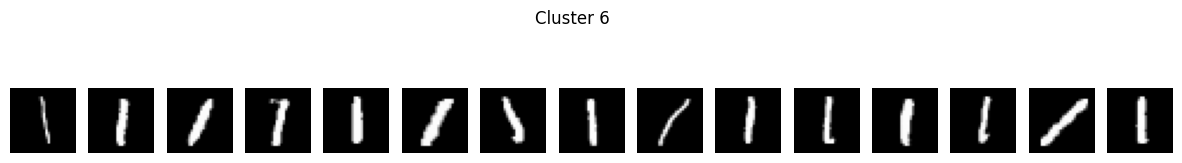

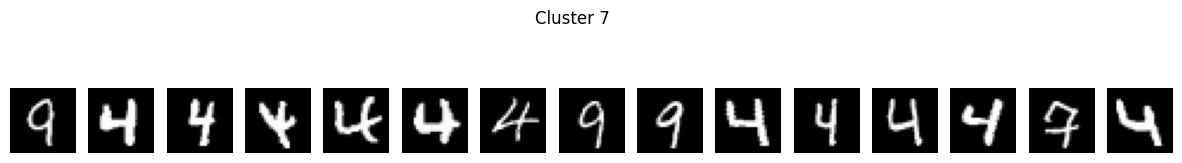

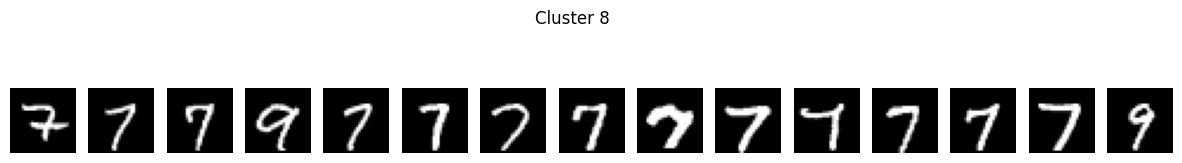

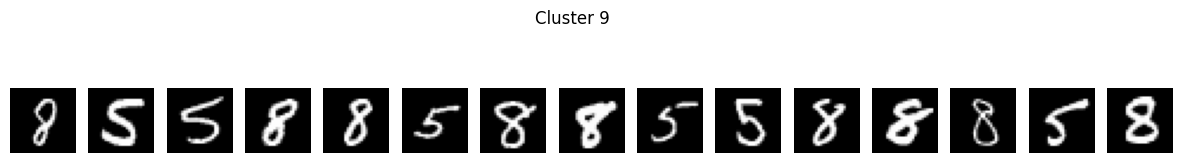

Saved labeled dataset to ../datasets/mnist_labeled.csv.gz (compressed)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import KMeans

class MNISTLabeler:
    def __init__(self, data_path):
        self.raw_images = np.load(data_path)  # Shape (60000, 1, 28, 28)
        self.features = self.raw_images.reshape(len(self.raw_images), -1)  # Flatten to 784 pixels
        self.labels = None
        self.cluster_map = {}
        
    def preprocess(self):
        """Prepare data for clustering while preserving original pixels"""
        # Scale features for clustering
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.features.astype(np.float32))
        
        # Dimensionality reduction pipeline
        pca = PCA(n_components=0.95)
        pca_features = pca.fit_transform(scaled_data)
        
        self.umap_features = UMAP(n_components=2, random_state=42).fit_transform(pca_features)
        return self
    
    def cluster(self, n_clusters=10):
        """Create initial clusters"""
        self.cluster_labels = KMeans(n_clusters=n_clusters, n_init='auto', 
                                   random_state=42).fit_predict(self.umap_features)
        return self
    
    def _show_cluster(self, cluster_id, n_samples=15):
        """Display random samples from a cluster"""
        cluster_mask = self.cluster_labels == cluster_id
        samples = np.random.choice(np.where(cluster_mask)[0], n_samples, replace=False)
        
        plt.figure(figsize=(15, 2))
        for i, idx in enumerate(samples):
            plt.subplot(1, n_samples, i+1)
            plt.imshow(self.raw_images[idx, 0], cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {cluster_id}', y=1.05)
        plt.show()
    
    def label_clusters(self):
        """Interactive cluster labeling"""
        unique_clusters = np.unique(self.cluster_labels)
        
        for cluster_id in unique_clusters:
            self._show_cluster(cluster_id)
            
            while True:
                label = input(f"Enter digit (0-9) for cluster {cluster_id}: ")
                if label.isdigit() and 0 <= int(label) <= 9:
                    self.cluster_map[cluster_id] = int(label)
                    break
                print("Invalid input! Please enter 0-9.")
        
        # Apply labels to all samples
        self.labels = np.array([self.cluster_map[c] for c in self.cluster_labels])
        return self
    
    def save_dataset(self, output_path):
        """Save original pixels with labels"""
        # Create DataFrame with pixel columns
        pixel_columns = [f'pixel_{i}' for i in range(784)]
        df = pd.DataFrame(self.features, columns=pixel_columns)
        df['label'] = self.labels
        
        # Save with compression for reduced file size
        df.to_csv(output_path, index=False, compression='gzip')
        print(f"Saved labeled dataset to {output_path} (compressed)")


if __name__ == "__main__":
    labeler = (MNISTLabeler('../datasets/unlabelled_train_data_images.npy')
              .preprocess()
              .cluster()
              .label_clusters()
              .save_dataset('../datasets/mnist_labeled.csv.gz'))


Model Evaluation:
Accuracy: 0.9472

Classification Report:
              precision    recall  f1-score   support

           0     0.9637    0.9677    0.9657      1206
           1     0.9527    0.9637    0.9582      1462
           2     0.9238    0.9465    0.9350      1216
           3     0.9357    0.9004    0.9177      1616
           4     0.9498    0.9558    0.9528      2377
           6     0.9541    0.9778    0.9658      1127
           7     0.9670    0.9772    0.9721      1229
           8     0.9355    0.9106    0.9229      1767

    accuracy                         0.9472     12000
   macro avg     0.9478    0.9500    0.9488     12000
weighted avg     0.9471    0.9472    0.9470     12000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


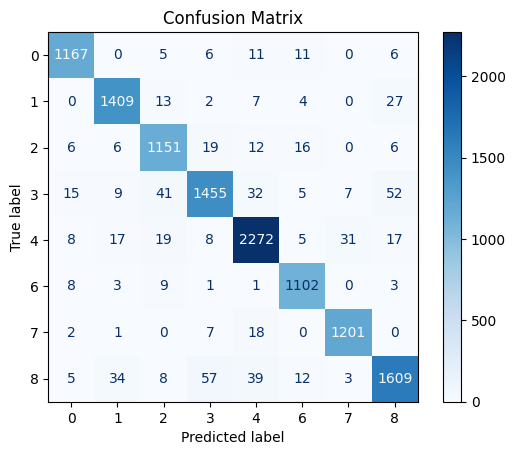

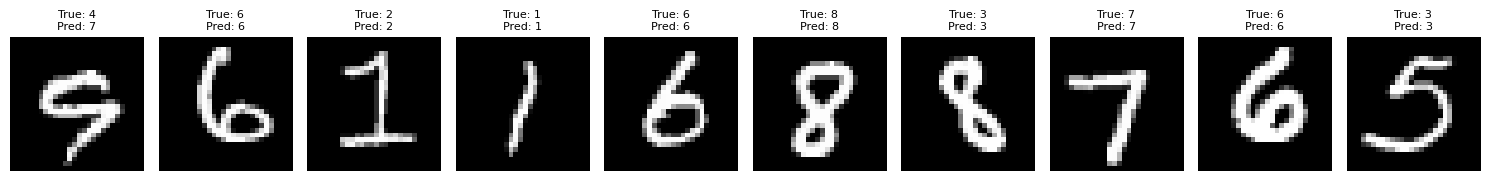


Sample Prediction: 4
True Label: 4


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)

def load_mnist_dataset(csv_path):
    """Load compressed MNIST dataset with original pixels and labels"""
    df = pd.read_csv(csv_path, compression='gzip')
    
    # Separate features (pixels) and labels
    X = df.drop('label', axis=1).values.astype(np.float32)
    y = df['label'].values.astype(np.int32)
    
    return X, y

def preprocess_data(X):
    """Normalize pixel values to 0-1 range"""
    return X / 255.0

def train_mlp_model(X_train, y_train):
    """Train a multi-layer perceptron classifier"""
    model = MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        alpha=0.001,
        learning_rate='adaptive',
        max_iter=50,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Generate comprehensive evaluation report"""
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def visualize_predictions(X_test, y_test, y_pred, num_images=10):
    """Display sample images with predicted/true labels"""
    indices = np.random.choice(len(X_test), num_images)
    
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # 1. Load dataset
    X, y = load_mnist_dataset('../datasets/mnist_labeled.csv.gz')
    
    # 2. Preprocess data
    X_normalized = preprocess_data(X)
    
    # 3. Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X_normalized, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # 4. Train model
    model = train_mlp_model(X_train, y_train)
    
    # 5. Evaluate
    print("Model Evaluation:")
    evaluate_model(model, X_test, y_test)
    
    # 6. Visualize predictions
    y_pred = model.predict(X_test)
    visualize_predictions(X_test, y_test, y_pred)
    
    # Example prediction
    sample_idx = np.random.randint(len(X_test))
    sample_image = X_test[sample_idx].reshape(1, -1)
    print(f"\nSample Prediction: {model.predict(sample_image)[0]}")
    print(f"True Label: {y_test[sample_idx]}")
